### Import Library

In [ ]:
import pandas as pd
import numpy  as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import feature_engine
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans

### import dataset

In [ ]:
user = pd.read_csv("data per user.csv")
user

,User_id,First App Open,Read Oboarding,Sign Up,Load Topic,Topic Choosed,Load Learning Page,Sub Topic Choosed,Read Material,Correct Answer Quiz,Finish Hooray1,Exercise Choosed1,Exercise Choosed2,Correct Answer Exercise,Finish Hooray2
0,0117FD20-2E2B-4F20-82C6-CEE3CAD0CB8F,1,1,1,1,1,1,1,1,1,1,1,0,0,0
1,09DFCEC7-0C88-4507-9BE3-718771A1AA39,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0AFFDB71-B14D-4F9C-BE5B-5A57A45E52C4,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0ECD5988-28CE-4B81-A492-C59D14432062,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,1227FF13-A01B-467F-BFC4-2145AE0FDF93,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,E5EB354C-E86B-47BF-89B7-8301EA52895A,1,1,0,0,0,0,0,0,0,0,0,0,0,0
70,F326FF4F-AF23-4F63-8414-02C71F00E0F1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
71,F6119266-3EDD-443F-9A80-24D53F1B24FB,1,1,1,1,1,1,1,1,1,1,1,1,1,1
72,FE2F2899-8C58-4849-A361-7BF1FB72F258,1,1,1,1,1,1,1,1,1,1,1,0,0,0


In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User_id                  74 non-null     object
 1   First App Open           74 non-null     int64 
 2   Read Oboarding           74 non-null     int64 
 3   Sign Up                  74 non-null     int64 
 4   Load Topic               74 non-null     int64 
 5   Topic Choosed            74 non-null     int64 
 6   Load Learning Page       74 non-null     int64 
 7   Sub Topic Choosed        74 non-null     int64 
 8   Read Material            74 non-null     int64 
 9   Correct Answer Quiz      74 non-null     int64 
 10  Finish Hooray1           74 non-null     int64 
 11  Exercise Choosed1        74 non-null     int64 
 12  Exercise Choosed2        74 non-null     int64 
 13  Correct Answer Exercise  74 non-null     int64 
 14  Finish Hooray2           74 non-null     int

### menampilkan user yang menyelesaikan sampai akhir

In [ ]:
selesai = user.groupby(['Finish Hooray2']).agg(
    total =('User_id','nunique'))
selesai.sort_values(by="total", ascending=False)

,total
Finish Hooray2,
0,53
1,21


### menampilkan langkah yang kebanyakan user berhenti

In [ ]:
selesai1 = user.groupby(['First App Open']).agg(
    userid =('User_id','nunique'))
selesai1.sort_values(by="userid", ascending=False)

,userid
First App Open,
1,74


In [ ]:
#selesai1.to_csv('selesai1.csv')

In [ ]:
selesai2 = user.groupby(['Read Oboarding']).agg(
    userid =('User_id','nunique'))
selesai2.sort_values(by="userid", ascending=False)

,userid
Read Oboarding,
1,68
0,6


In [ ]:
#selesai2.to_csv('selesai2.csv')

In [ ]:
selesai3 = user.groupby(['Sign Up']).agg(
    userid =('User_id','nunique'))
selesai3.sort_values(by="userid", ascending=False)

,userid
Sign Up,
1,56
0,18


In [ ]:
#selesai3.to_csv('selesai3.csv')

In [ ]:
selesai4 = user.groupby(['Load Topic']).agg(
    userid =('User_id','nunique'))
selesai4.sort_values(by="userid", ascending=False)

,userid
Load Topic,
1,47
0,27


In [ ]:
#selesai4.to_csv('selesai4.csv')

In [ ]:
selesai5 = user.groupby(['Topic Choosed']).agg(
    userid =('User_id','nunique'))
selesai5.sort_values(by="userid", ascending=False)

,userid
Topic Choosed,
1,43
0,31


In [ ]:
#selesai5.to_csv('selesai5.csv')

In [ ]:
selesai6 = user.groupby(['Load Learning Page']).agg(
    userid =('User_id','nunique'))
selesai6.sort_values(by="userid", ascending=False)

,userid
Load Learning Page,
1,43
0,31


In [ ]:
#selesai6.to_csv('selesai6.csv')

In [ ]:
selesai7 = user.groupby(['Sub Topic Choosed']).agg(
    userid =('User_id','nunique'))
selesai7.sort_values(by="userid", ascending=False)

,userid
Sub Topic Choosed,
1,40
0,34


In [ ]:
#selesai7.to_csv('selesai7.csv')

In [ ]:
selesai8 = user.groupby(['Read Material']).agg(
    userid =('User_id','nunique'))
selesai8.sort_values(by="userid", ascending=False)

,userid
Read Material,
1,40
0,34


In [ ]:
#selesai8.to_csv('selesai8.csv')

In [ ]:
selesai9 = user.groupby(['Correct Answer Quiz']).agg(
    userid =('User_id','nunique'))
selesai9.sort_values(by="userid", ascending=False)

,userid
Correct Answer Quiz,
0,38
1,36


In [ ]:
#selesai9.to_csv('selesai9.csv')

In [ ]:
selesai10 = user.groupby(['Finish Hooray1']).agg(
    userid =('User_id','nunique'))
selesai10.sort_values(by="userid", ascending=False)

,userid
Finish Hooray1,
0,38
1,36


In [ ]:
#selesai10.to_csv('selesai10.csv')

In [ ]:
selesai11 = user.groupby(['Exercise Choosed1']).agg(
    userid =('User_id','nunique'))
selesai11.sort_values(by="userid", ascending=False)

,userid
Exercise Choosed1,
0,42
1,32


In [ ]:
#selesai11.to_csv('selesai11.csv')

In [ ]:
selesai12 = user.groupby(['Exercise Choosed2']).agg(
    userid =('User_id','nunique'))
selesai12.sort_values(by="userid", ascending=False)

,userid
Exercise Choosed2,
0,48
1,26


In [ ]:
#selesai12.to_csv('selesai12.csv')

In [ ]:
selesai13 = user.groupby(['Correct Answer Exercise']).agg(
    userid =('User_id','nunique'))
selesai13.sort_values(by="userid", ascending=False)

,userid
Correct Answer Exercise,
0,51
1,23


In [ ]:
#selesai13.to_csv('selesai13.csv')

In [ ]:
selesai14 = user.groupby(['Finish Hooray2']).agg(
    userid =('User_id','nunique'))
selesai14.sort_values(by="userid", ascending=False)

,userid
Finish Hooray2,
0,53
1,21


In [ ]:
#selesai14.to_csv('selesai14.csv')

### melihat hasil

In [ ]:
hasil = pd.read_csv('langkah.csv')
hasil

,langkah,step 0,step 1
0,First App Open,0,74
1,Read Oboarding,6,68
2,Sign Up,18,56
3,Load Topic,27,47
4,Topic Choosed,31,43
5,Load Learning Page,31,43
6,Sub Topic Choosed,34,40
7,Read Material,34,40
8,Correct Answer Quiz,38,36
9,Finish Hooray1,38,36


In [ ]:
deskriptif = hasil.describe()
deskriptif

,step 0,step 1
count,14.000000,14.000000
mean,32.214286,41.785714
std,15.591805,15.591805
min,0.000000,21.000000
25%,28.000000,33.000000
50%,34.000000,40.000000
75%,41.000000,46.000000
max,53.000000,74.000000


Text(0.5, 0, 'Statistik Deskriptif')

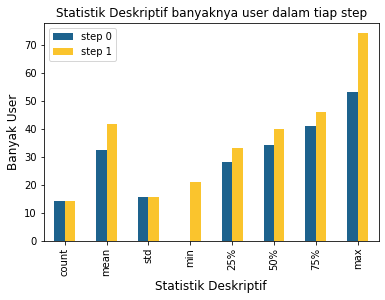

In [ ]:
plt.figure;
deskriptif.plot(kind="bar", color=['#1D628D','#FAC42D']);
plt.title('Statistik Deskriptif banyaknya user dalam tiap step', size=12)
plt.ylabel('Banyak User', size=12)
plt.xlabel('Statistik Deskriptif', size=12)

visualisasi

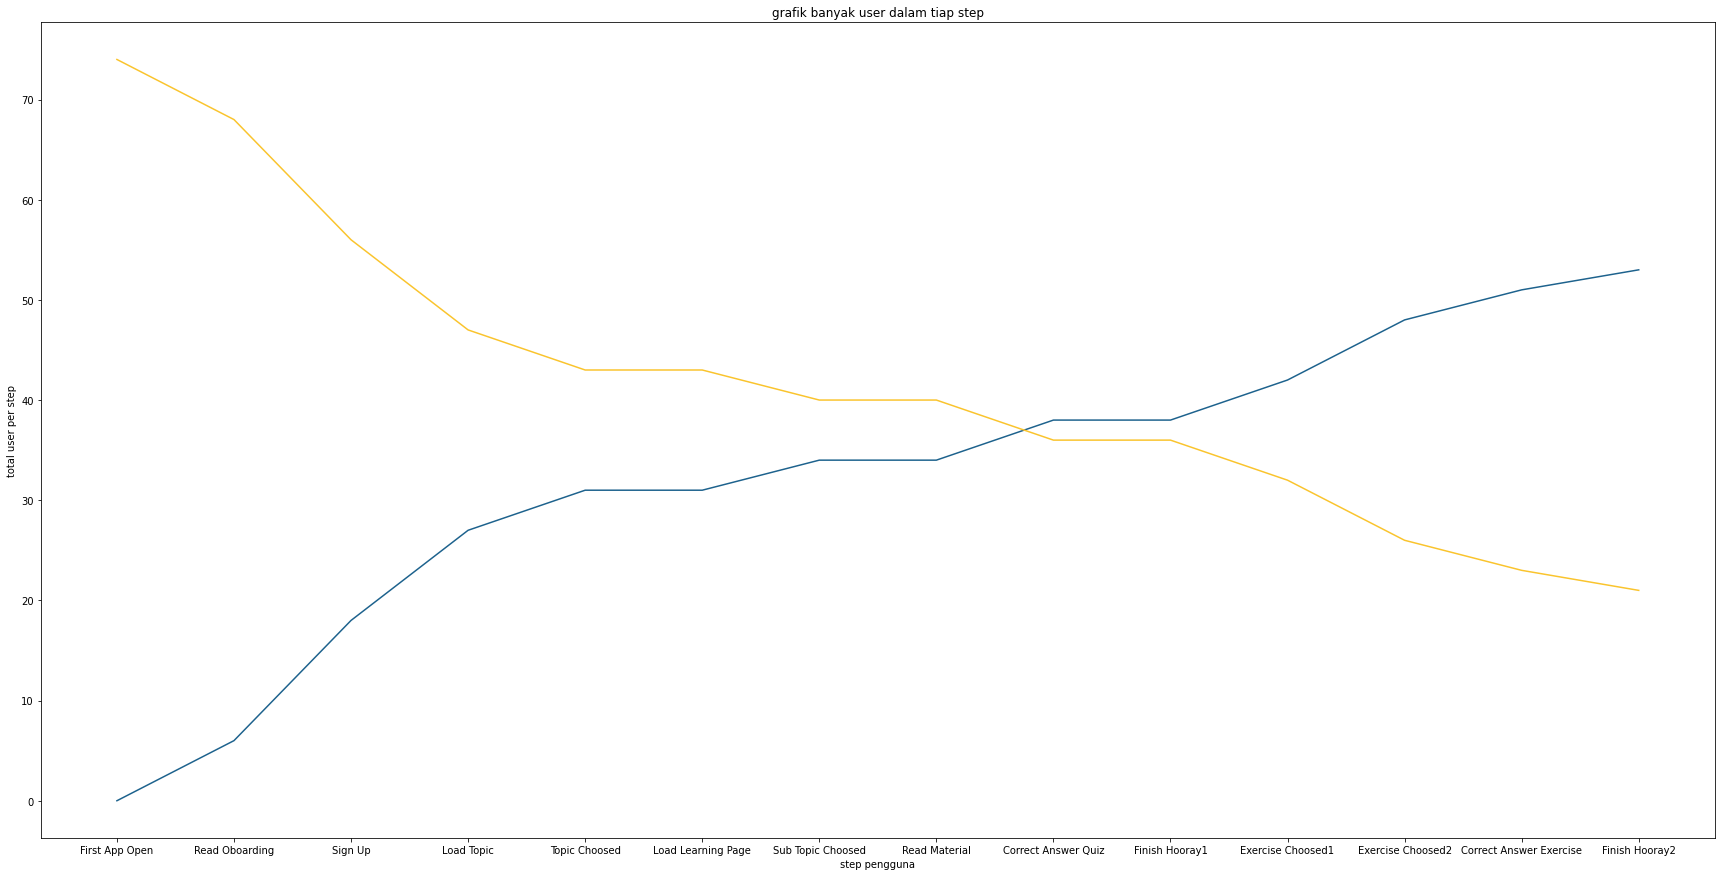

In [ ]:
fig = plt.figure(figsize=(30,15))
ax = plt.axes()
ax.plot(hasil['langkah'],hasil['step 0'], color='#1D628D')
ax.plot(hasil['langkah'],hasil['step 1'], color='#FAC42D')
ax.set_title('grafik banyak user dalam tiap step')
y = ax.set_ylabel('total user per step')
x = ax.set_xlabel('step pengguna')

# Clustering K- Means

In [ ]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 290 kB 41.4 MB/s 


In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import feature_engine
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans

In [ ]:
X = user.iloc[:, [3, 4]].values

<ipython-input-25-e047a82f5809>:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans.fit(X)
<ipython-input-25-e047a82f5809>:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(X)
<ipython-input-25-e047a82f5809>:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(X)
<ipython-input-25-e047a82f5809>:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans.fit(X)
<ipython-input-25-e047a82f5809>:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans.fit(X)
<ipython-input-25-e047a82f5809>:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_cluster

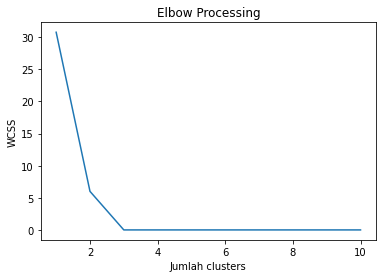

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 40)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Processing')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 40)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 1, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 1, 2,
       0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0], dtype=int32)

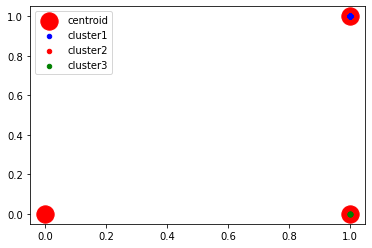

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)


plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'centroid')
plt.scatter(X[pred_y == 0,0],X[pred_y == 0,1], s = 20, c = 'blue', label = 'cluster1')
plt.scatter(X[pred_y == 1,0],X[pred_y == 1,1], s = 20, c = 'red', label = 'cluster2')
plt.scatter(X[pred_y == 2,0],X[pred_y == 2,1], s = 20, c = 'green', label = 'cluster3')
plt.legend()
plt.show()

### Clustering K-Means Lainnya

import dataset

In [ ]:
user_new = user.drop('User_id', axis=1)
user_new

,First App Open,Read Oboarding,Sign Up,Load Topic,Topic Choosed,Load Learning Page,Sub Topic Choosed,Read Material,Correct Answer Quiz,Finish Hooray1,Exercise Choosed1,Exercise Choosed2,Correct Answer Exercise,Finish Hooray2
0,1,1,1,1,1,1,1,1,1,1,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,1,1,0,0,0,0,0,0,0,0,0,0,0,0
70,1,1,1,1,1,1,1,1,1,1,1,1,1,0
71,1,1,1,1,1,1,1,1,1,1,1,1,1,1
72,1,1,1,1,1,1,1,1,1,1,1,0,0,0


heatmap cek

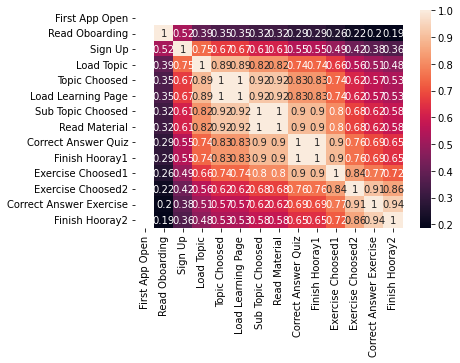

In [ ]:
sns.heatmap(user.corr(), annot=True);

contoh analisis distribusi

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


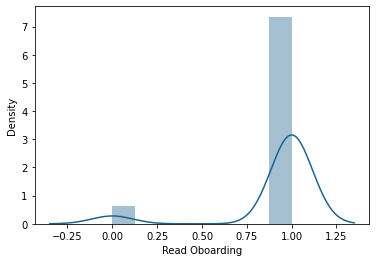

In [ ]:
sns.distplot(user['Read Oboarding'], color='#1D628D')

Membuat transformasi log untuk mengurangi variasi angka setiap variabel

In [ ]:
user_log = user_new.copy()
user_log.head()

,First App Open,Read Oboarding,Sign Up,Load Topic,Topic Choosed,Load Learning Page,Sub Topic Choosed,Read Material,Correct Answer Quiz,Finish Hooray1,Exercise Choosed1,Exercise Choosed2,Correct Answer Exercise,Finish Hooray2
0,1,1,1,1,1,1,1,1,1,1,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
user_log = np.log(user_log+1)

In [ ]:
windsoriser = Winsorizer(tail='both', # cap left, right or both tails 
                          fold=2,
                           variables=[ 'First App Open', 'Read Oboarding', 'Sign Up', 'Load Topic']
                        )
windsoriser.fit(user_log)

Winsorizer(fold=2, tail='both',
           variables=['First App Open', 'Read Oboarding', 'Sign Up',
                      'Load Topic'])

In [ ]:
user_log1 = windsoriser.transform(user_log)

In [ ]:
scaler = StandardScaler()

scaler.fit(user_log1)

user_New_scaled = scaler.transform(user_log1)

In [ ]:
user_new_scaled = pd.DataFrame(user_New_scaled, columns=user_new.columns)
user_new_scaled.head()

,First App Open,Read Oboarding,Sign Up,Load Topic,Topic Choosed,Load Learning Page,Sub Topic Choosed,Read Material,Correct Answer Quiz,Finish Hooray1,Exercise Choosed1,Exercise Choosed2,Correct Answer Exercise,Finish Hooray2
0,-1.110223e-16,0.297044,0.566947,0.757937,0.849076,0.849076,0.921954,0.921954,1.027402,1.027402,1.145644,-0.735980,-0.671551,-0.629465
1,-1.110223e-16,-3.366502,-1.763834,-1.319371,-1.177751,-1.177751,-1.084652,-1.084652,-0.973329,-0.973329,-0.872872,-0.735980,-0.671551,-0.629465
2,-1.110223e-16,-3.366502,-1.763834,-1.319371,-1.177751,-1.177751,-1.084652,-1.084652,-0.973329,-0.973329,-0.872872,-0.735980,-0.671551,-0.629465
3,-1.110223e-16,0.297044,0.566947,-1.319371,-1.177751,-1.177751,-1.084652,-1.084652,-0.973329,-0.973329,-0.872872,-0.735980,-0.671551,-0.629465
4,-1.110223e-16,0.297044,0.566947,0.757937,0.849076,0.849076,0.921954,0.921954,1.027402,1.027402,1.145644,1.358732,1.489091,1.588650


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


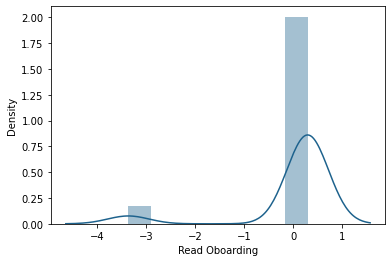

In [ ]:
sns.distplot(user_new_scaled['Read Oboarding'], color='#1D628D')

mencari nilai optimal dari cluster

In [ ]:
X = np.asarray(user_New_scaled)

<ipython-input-40-0d2e3ea7fd6d>:5: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  km = km.fit(X)
<ipython-input-40-0d2e3ea7fd6d>:5: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  km = km.fit(X)
<ipython-input-40-0d2e3ea7fd6d>:5: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  km = km.fit(X)
<ipython-input-40-0d2e3ea7fd6d>:5: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  km = km.fit(X)


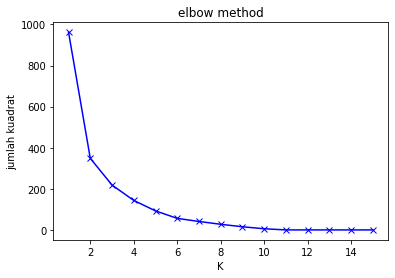

In [ ]:
Sum_of_squared_distances = []
K = range(1,16)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('jumlah kuadrat')
plt.title('elbow method')
plt.show()

membuat grafik clustering 

- clustering 3
- clustering 4
- clustering 5

In [ ]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default lea

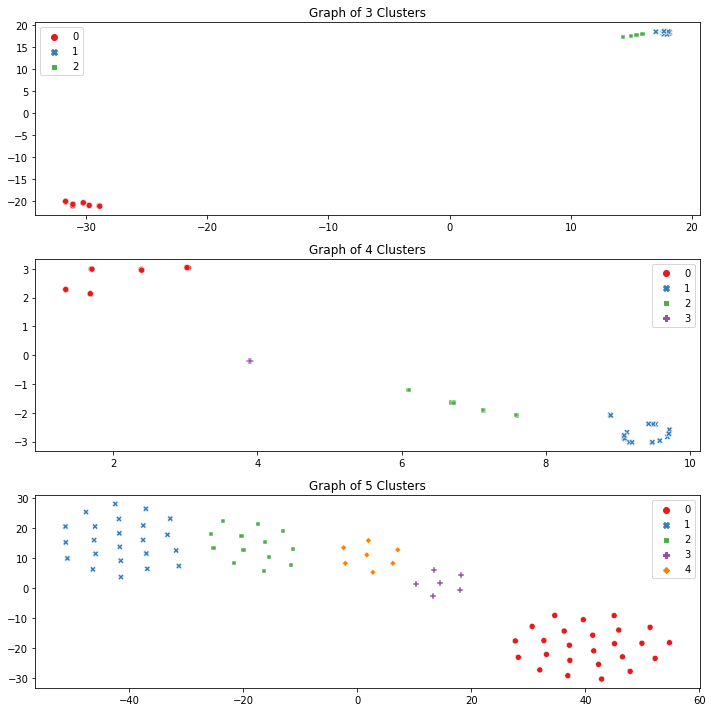

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(user_New_scaled, 3, user_new)

plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(user_New_scaled, 4, user_new)

plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(user_New_scaled, 5, user_new)

plt.tight_layout()

visualisasi cluster dengan metode snake plot

In [ ]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):

    normalised_df_rfm = pd.DataFrame(normalised_df_rfm, 
                                       index=user_new.index, 
                                       columns=user_new.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']

    # Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(), 
                        id_vars=['First App Open', 'Cluster'],
                        value_vars=['Read Oboarding', 'Sign Up', 'Load Topic', 'Topic Choosed','Load Learning Page', 'Sub Topic Choosed', 'Read Material',
                                    'Correct Answer Quiz','Finish Hooray1', 'Exercise Choosed1', 'Exercise Choosed2', 'Correct Answer Exercise',
                                    'Finish Hooray2'], 
                        var_name='Metric', 
                        value_name='Value')

    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')
    
    return

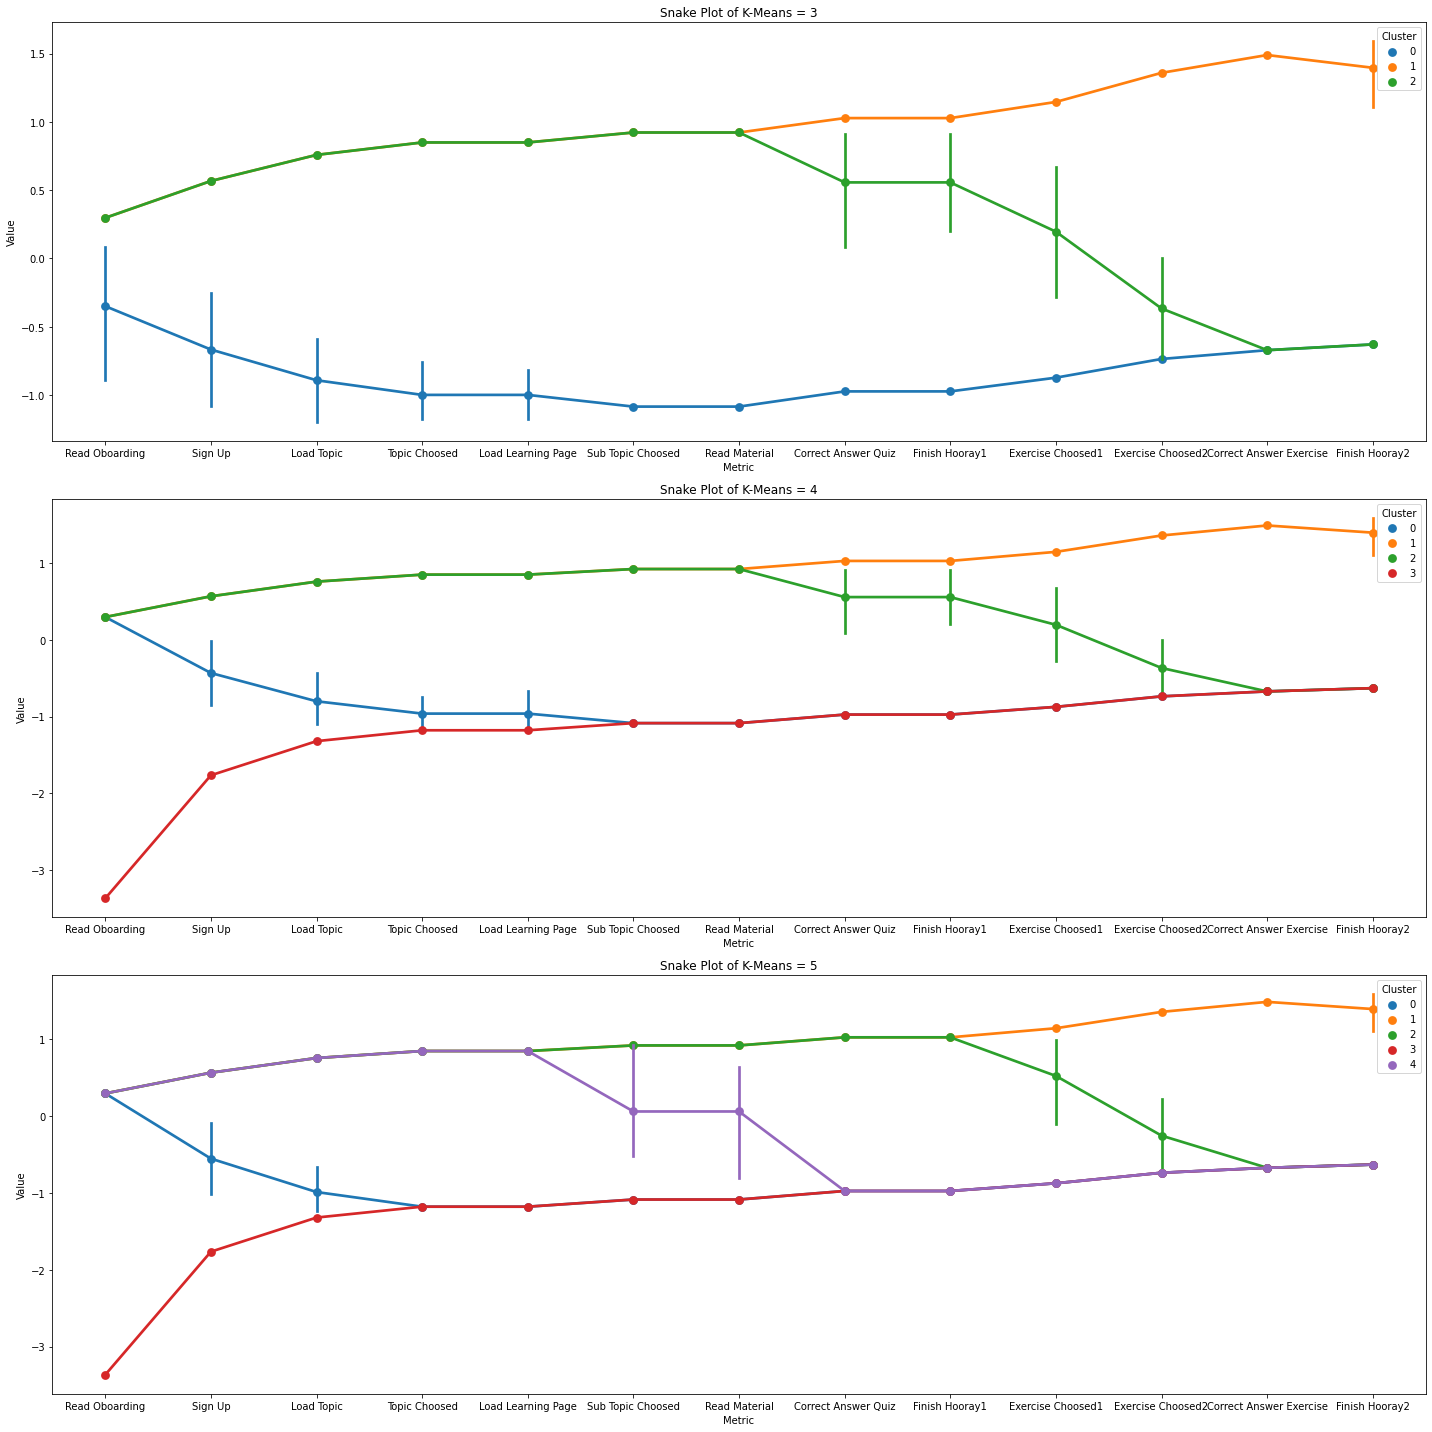

In [ ]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 1, 1)
plt.title('Snake Plot of K-Means = 3')
snake_plot(user_New_scaled, df_rfm_k3, user_new)

plt.subplot(3, 1, 2)
plt.title('Snake Plot of K-Means = 4')
snake_plot(user_New_scaled, df_rfm_k4, user_new)

plt.subplot(3, 1, 3)
plt.title('Snake Plot of K-Means = 5')
snake_plot(user_New_scaled, df_rfm_k5, user_new)

plt.tight_layout()

### Evaluasi K-Means Model ( Davies Bouldin Score )

K-Means cluster = 3

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [ ]:
print(davies_bouldin_score(X, kmeans.labels_))

0.7339983787427199


K-Means cluster = 4

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [ ]:
print(davies_bouldin_score(X, kmeans.labels_))

0.5779660211415356


K-Means cluster = 5

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [ ]:
print(davies_bouldin_score(X, kmeans.labels_))

0.6077870846757921


### Davies Bouldin Score Terkecil = K-Means Cluster 4

In [ ]:
df_rfm_k4.head()

,First App Open,Read Oboarding,Sign Up,Load Topic,Topic Choosed,Load Learning Page,Sub Topic Choosed,Read Material,Correct Answer Quiz,Finish Hooray1,Exercise Choosed1,Exercise Choosed2,Correct Answer Exercise,Finish Hooray2,Cluster
0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,2
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


### Visualisasi Jumlah Cluster

In [ ]:
hitung = df_rfm_k4.Cluster.value_counts()
hitung

0    28
1    23
2    17
3     6
Name: Cluster, dtype: int64

Text(0.5, 0, 'Cluster')

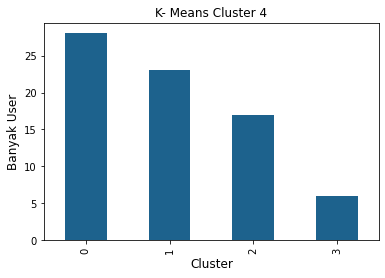

In [ ]:
plt.figure;
hitung.plot(kind="bar", color='#1D628D');
plt.title('K- Means Cluster 4', size=12)
plt.ylabel('Banyak User', size=12)
plt.xlabel('Cluster', size=12)